<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Deep_Learning_Chollet/blob/main/DL_chollet_chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Timing Code
import pytz
import time
import datetime

t0 = time.time()
now_utc = datetime.datetime.utcnow()
ist_tz = pytz.timezone('Asia/Kolkata')
now_ist = now_utc.astimezone(ist_tz)
print("Current time in IST:", now_ist.strftime("%Y-%m-%d %H:%M:%S %Z%z"))

Current time in IST: 2023-04-18 02:35:49 IST+0530


# Classification and Regression with NNs

# Binary Classification
IMDB Dataset

### Loading the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
#num_words = 1000 means only keeping top 10000 words in the data 

In [ ]:
len(train_data)


25000

In [ ]:
# train_data : list of reviews, each review containing a list of word indices ( encoding a sequence of words)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# train_labels, 0 , 1 , -ve, +ve review 
train_labels[0]

1

In [ ]:
# word index should not exceed 10000, since we are only using top 10000 wods 
max([max(sequence) for sequence in train_data])

9999

#### Decoding the review as text

In [ ]:
# Decoding the reviews to text 

word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict([(value,key) for key,value in word_index.items()]) # This gives us a dictionary that maps integer indices to words, which we can use to decode the reviews.

# The imdb.get_word_index() function returns a dictionary that maps words to integer indices. 
# In the returned dictionary, each key is a word and each value is its corresponding index. 
# However, we need a mapping from indices to words, which is what the second line of code accomplishes.

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]]) # indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

# "?" is the second parameter foe default value to be returned if not found in dict 

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the Data

In [ ]:
train_data_review_len = [ len(i) for i in train_data]
train_data_review_len[:10]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

The reviews are of different length. 

You can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors.

### Multi-Hot-Encoding

Converting the reviews to tensors 


Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorizing the labels  

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

print(type(y_train))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The data is ready to be fed into a NN

## Building the Model

**Keras Model**

- following architecture choices:
    Two intermediate layers with 16 units each

    A third layer that will output the scalar prediction regarding the sentiment of the current review
    

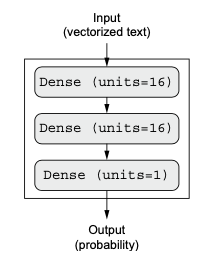

### Model Definition

In [ ]:
## NN model 

from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")    

])


### Model Compilation

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Validating the approach

### Creating a validation set

In [ ]:
len(x_train)

25000

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## Training the Model

In [ ]:
t1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

print("Took:{0:.2f} secs to train".format(time.time() - t1))

Epoch 1/20
30/30 [==============================] - 8s 76ms/step - loss: 0.5302 - accuracy: 0.7875 - val_loss: 0.4140 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3367 - accuracy: 0.8915 - val_loss: 0.3222 - val_accuracy: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2507 - accuracy: 0.9169 - val_loss: 0.2896 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2010 - accuracy: 0.9325 - val_loss: 0.2932 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1712 - accuracy: 0.9444 - val_loss: 0.2751 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1456 - accuracy: 0.9533 - val_loss: 0.2813 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1298 - accuracy: 0.9589 - val_loss: 0.2912 - val_accuracy: 0.8847
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the training and validation loss

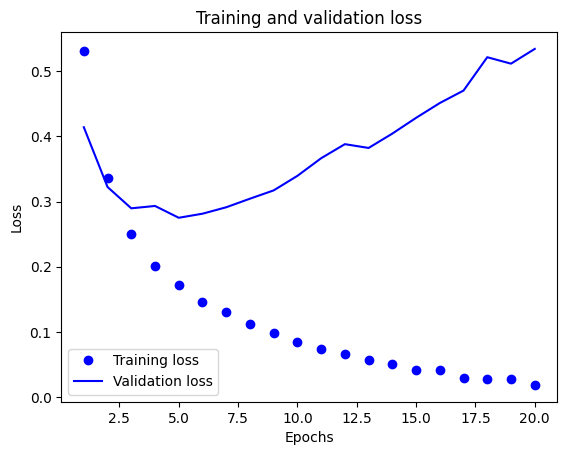

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation loss

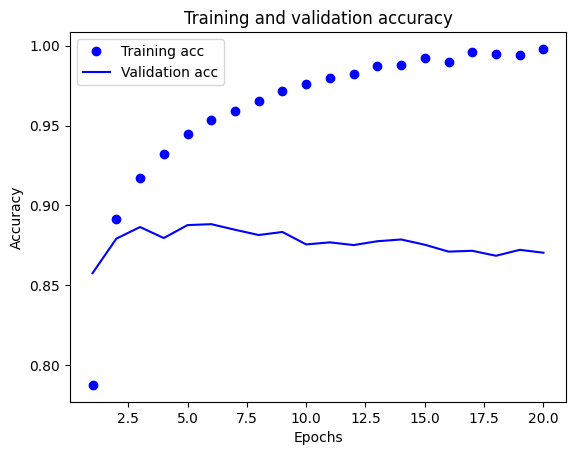

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Overfitting**

the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient- descent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t gener- alize to data outside of the training set.
In this case, to prevent overfitting, you could stop training after four epochs

### Retraining a model from Scratch


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"],
              )
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 39ms/step - loss: 0.4926 - accuracy: 0.7946 - val_loss: 0.3156 - val_accuracy: 0.9075
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2875 - accuracy: 0.9021 - val_loss: 0.2197 - val_accuracy: 0.9325
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2251 - accuracy: 0.9201 - val_loss: 0.1786 - val_accuracy: 0.9453
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2970 - accuracy: 0.8800


In [ ]:
results

# The first number, 0.29, is the test loss, and the second number, 0.88, is the test accuracy.

[0.2969951331615448, 0.8800399899482727]

## Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

*Output shows the likelihood of reviews being positive*

## Changing model layers 

In [ ]:
# 4 layers, 32 Neurons
from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"],
              )
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))


Epoch 1/20
49/49 [==============================] - 3s 37ms/step - loss: 0.4621 - accuracy: 0.7940 - val_loss: 0.2875 - val_accuracy: 0.8971
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2649 - accuracy: 0.8988 - val_loss: 0.2042 - val_accuracy: 0.9246
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2097 - accuracy: 0.9202 - val_loss: 0.1552 - val_accuracy: 0.9491
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1727 - accuracy: 0.9372 - val_loss: 0.1461 - val_accuracy: 0.9488
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1402 - accuracy: 0.9483 - val_loss: 0.1405 - val_accuracy: 0.9459
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1239 - accuracy: 0.9539 - val_loss: 0.0778 - val_accuracy: 0.9774
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1007 - accuracy: 0.9636 - val_loss: 0.0580 - val_accuracy: 0.9856
Epoch 8/20
49

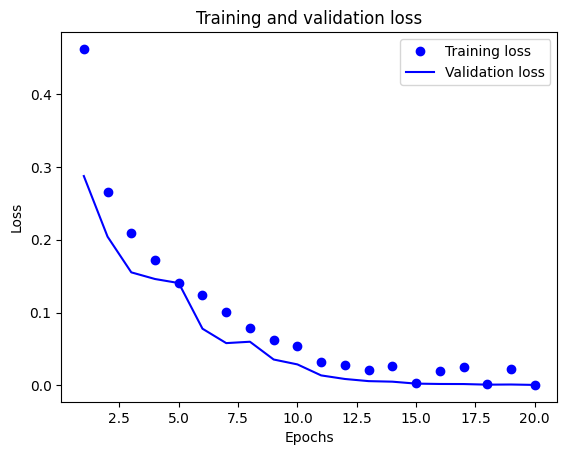

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

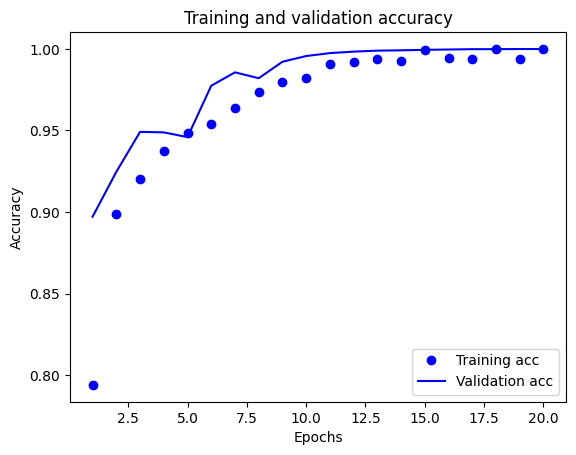

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 3ms/step - loss: 0.8673 - accuracy: 0.8614
[0.8673160076141357, 0.8614000082015991]


Training and validation loss decreased, but accuracy decreased too ???

# Multiclass classification : Classifying newswires
Reuters Dataset



***Single labelled multiclass classification*** is a type of classification problem where **each input data point is associated with one and only one label, and there are multiple possible labels**. This is also known as a ***multiclass classification problem with a single label***.

In single labelled multiclass classification, *the goal is to build a model that can accurately predict the correct label for each input data point*. The model takes in a set of features as input, and then predicts a single label from a set of possible labels. The set of possible labels can be binary (i.e. two possible labels) or multiclass (i.e. more than two possible labels).

Common examples of single labelled multiclass classification problems include:

- Predicting the species of a flower based on its petal and sepal dimensions (where the possible labels are the different species of flowers)
- Identifying the type of handwritten digit in an image (where the possible labels are the numbers 0-9)
- Predicting the genre of a book based on its plot summary and other metadata (where the possible labels are the different genres of books)

Single labelled multiclass classification can be tackled using a variety of machine learning algorithms, including logistic regression, support vector machines (SVMs), decision trees, random forests, and neural networks. The choice of algorithm depends on the specific problem and the amount of data available, as well as the desired level of accuracy and interpretability of the model.

## Loading the Dataset 

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

### Decoding the data to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## Preparing the Data

### Encoding the input data

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


### Encoding the labels

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [8]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Encoding using built in function

In [9]:
from tensorflow.keras.utils import to_categorical
to_categorical??

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Building Model

In a stack of Dense layers like those we’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottle- neck. In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping rele- vant information.
For this reason we’ll use larger layers. Let’s go with 64 units.


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


There are two other things you should note about this architecture.
First, we end the model with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.
Second, the last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the model will output a probability distribution over the 46 different output classes—for every input sample, the model will produce a 46-dimensional out- put vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

### Compiling the model

In [12]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

categorical_crossentropy. It mea- sures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.


### Validation Set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Training the model

In [14]:
import time
t2 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

print(F"took: {time.time()-t2:.2f} secs to train")

Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 2.7379 - accuracy: 0.4979 - val_loss: 1.8278 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.5157 - accuracy: 0.6893 - val_loss: 1.3675 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.1498 - accuracy: 0.7554 - val_loss: 1.1760 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.9291 - accuracy: 0.8047 - val_loss: 1.0876 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.7657 - accuracy: 0.8379 - val_loss: 0.9974 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6328 - accuracy: 0.8670 - val_loss: 0.9742 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5316 - accuracy: 0.8850 - val_loss: 0.9130 - val_accuracy: 0.8140
Epoch 8/20
16

### Plotting the training and validation loss

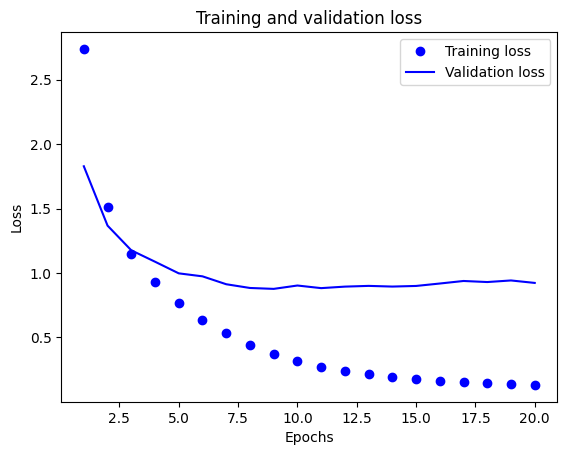

In [15]:
import matplotlib.pyplot as plt
plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation accuracy

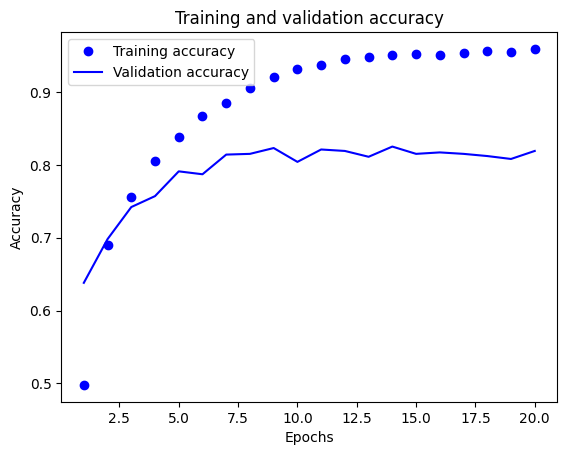

In [16]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Retraining the model 
The model begins to overfit after nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

In [17]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 35ms/step - loss: 2.5723 - accuracy: 0.5275
Epoch 2/9
18/18 [==============================] - 1s 28ms/step - loss: 1.4315 - accuracy: 0.6963
Epoch 3/9
18/18 [==============================] - 0s 27ms/step - loss: 1.1013 - accuracy: 0.7617
Epoch 4/9
18/18 [==============================] - 0s 27ms/step - loss: 0.8940 - accuracy: 0.8078
Epoch 5/9
18/18 [==============================] - 1s 28ms/step - loss: 0.7310 - accuracy: 0.8440
Epoch 6/9
18/18 [==============================] - 1s 28ms/step - loss: 0.6062 - accuracy: 0.8717
Epoch 7/9
18/18 [==============================] - 0s 27ms/step - loss: 0.5011 - accuracy: 0.8930
Epoch 8/9
18/18 [==============================] - 1s 29ms/step - loss: 0.4167 - accuracy: 0.9123
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.7934


In [18]:
results

[0.9183318018913269, 0.7934104800224304]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case, we have 46 classes, and they may not be equally represented.

### Emperical Classification check

What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically:


In [21]:
import numpy as np
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18388245770258238

a random classifier would score around 19% classification accuracy, so the results of our model seem pretty good in that light.


**Code explanation** of the above code from ChatGPT

This code is performing a simple experiment to evaluate the performance of a model.

First, it creates a copy of the test_labels array using copy.copy() method from the copy module to ensure that the original array is not modified during the experiment.
Next, it shuffles the elements of the test_labels_copy array randomly using np.random.shuffle().
Then, it creates a Boolean array hits_array by comparing each element of the original test_labels array with the corresponding element of the shuffled test_labels_copy array. The == operator performs element-wise comparison and returns a Boolean array of the same shape as the input arrays.
Finally, it calculates the mean of hits_array to get the fraction of correctly classified samples by the model.
**The idea behind this experiment is to measure the baseline performance of the model by randomly guessing the class labels. If the model is not able to achieve accuracy better than this baseline, it may indicate that the model is not performing well and needs improvement.**